<a href="https://colab.research.google.com/github/benjaminmugangu/TP1_IA/blob/main/FINAL_VERSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Valeurs manquantes par colonne:
Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64


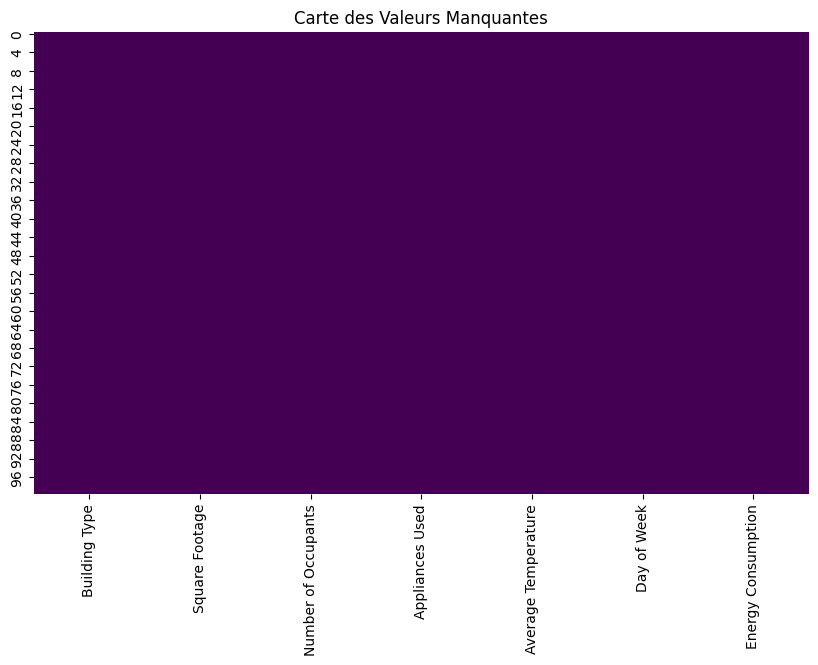

In [ ]:
import pandas as pd
import numpy as np

# Chargement des données
df = pd.read_csv('/home/test_energy_data.csv')

# 1. Analyse des valeurs manquantes
missing_data = df.isnull().sum()
print("Valeurs manquantes par colonne:")
print(missing_data)

# 2. Visualisation des patterns
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Carte des Valeurs Manquantes')
plt.show()

# 3. Stratégie d'imputation
# Pour les variables numériques
num_cols = ['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature', 'Day of Week', 'Energy Consumption']
for col in num_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Colonne {col}: {df[col].isnull().sum()} valeurs manquantes remplacées par la médiane {median_val:.2f}")

# Pour les variables catégorielles
cat_cols = ['Building Type', 'Day of Week']
for col in cat_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Colonne {col}: {df[col].isnull().sum()} valeurs manquantes remplacées par le mode '{mode_val}'")

In [ ]:
# 1. Détection des doublons exacts
duplicates = df.duplicated()
print(f"Nombre de doublons exacts: {duplicates.sum()}")

if duplicates.sum() > 0:
    df = df.drop_duplicates()
    print("Doublons supprimés")

# 2. Détection des doublons approximatifs (basé sur les features)
from sklearn.neighbors import NearestNeighbors

# Sélection des features pertinentes pour la détection
# Exclure 'Day of Week' car c'est une variable catégorielle
features = ['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature', 'Day of Week', 'Energy Consumption']

# Normalisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df[features])

# Recherche des voisins les plus proches
nbrs = NearestNeighbors(n_neighbors=2).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Identification des potentiels doublons (distance < seuil)
duplicate_threshold = 0.1
potential_duplicates = distances[:,1] < duplicate_threshold

print(f"Potentiels doublons approximatifs: {potential_duplicates.sum()}")
if potential_duplicates.sum() > 0:
    print("\nExemples de potentiels doublons:")
    for i in np.where(potential_duplicates)[0][:5]:
        print(f"\nLigne {i}:")
        print(df.iloc[i])
        print("\nVoisin le plus proche (ligne {indices[i,1]}):")
        print(df.iloc[indices[i,1]])
        print("-------------------")

Nombre de doublons exacts: 0
Potentiels doublons approximatifs: 0


Normalisation - Exemple de valeurs transformées:
     Square Footage  Number of Occupants  Appliances Used  \
min             0.0                  0.0              0.0   
max             1.0                  1.0              1.0   

     Average Temperature  Energy Consumption  
min                  0.0                 0.0  
max                  1.0                 1.0  

Standardisation - Statistiques transformées:
      Square Footage  Number of Occupants  Appliances Used  \
mean    1.199041e-16         1.088019e-16     8.104628e-17   
std     1.005038e+00         1.005038e+00     1.005038e+00   

      Average Temperature  Energy Consumption  
mean         2.065015e-16       -1.743050e-16  
std          1.005038e+00        1.005038e+00  


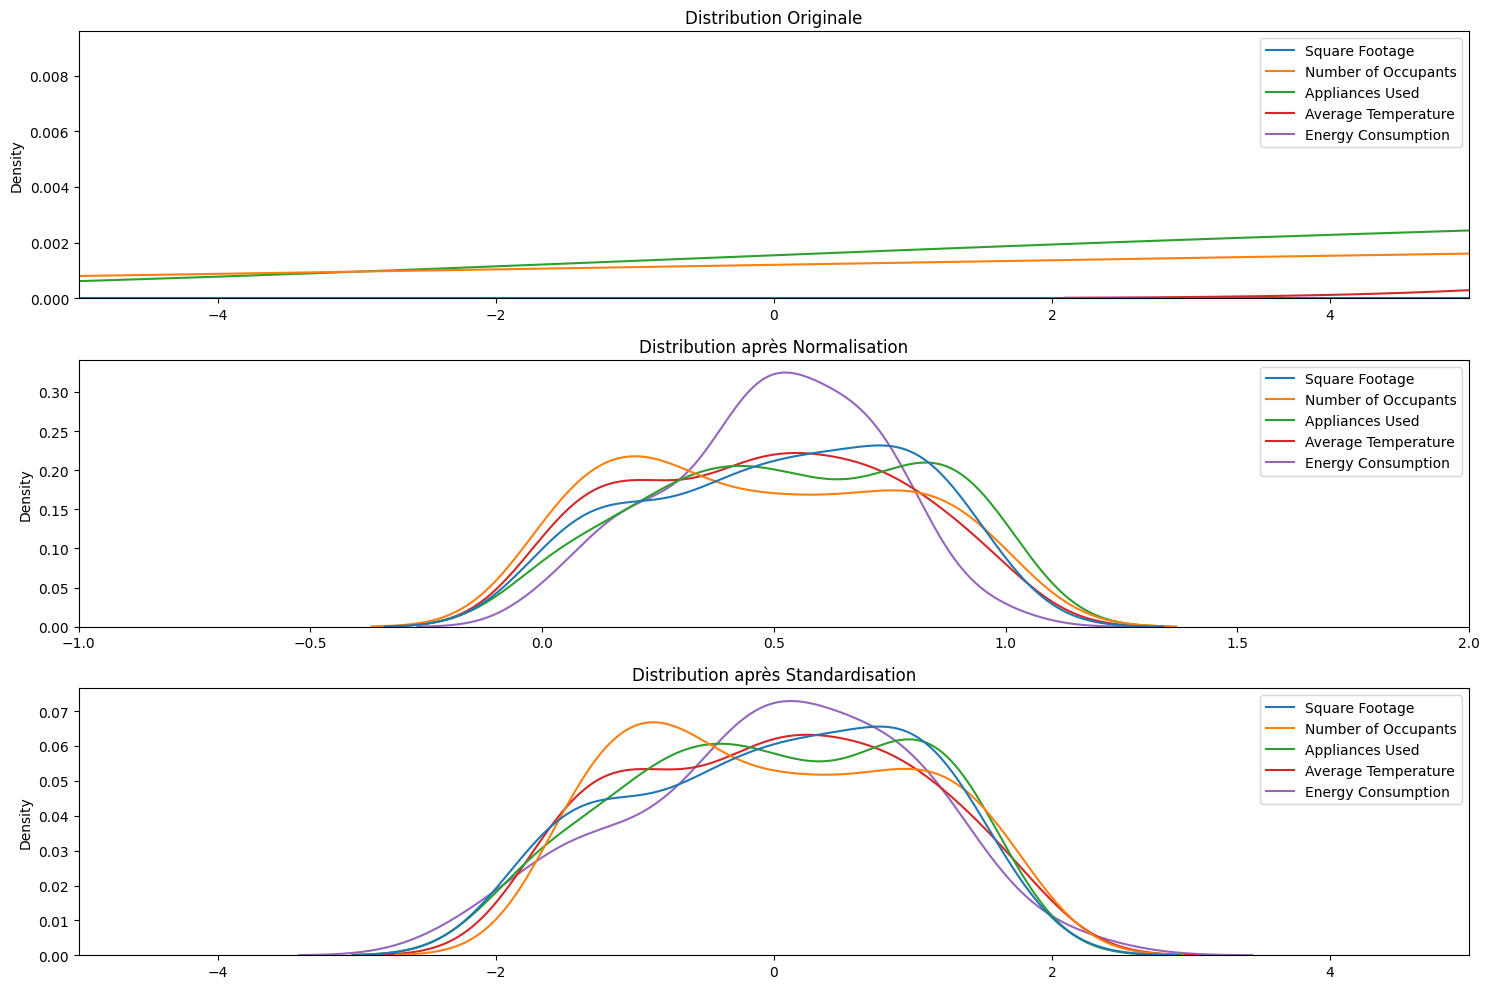

In [ ]:
numeric_features = ['Square Footage', 'Number of Occupants',
                   'Appliances Used', 'Average Temperature',
                    'Energy Consumption']
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler(feature_range=(0, 1))  # Intervalle [0,1]
df_minmax = df.copy()
df_minmax[numeric_features] = minmax.fit_transform(df[numeric_features])

# Vérification
print("Normalisation - Exemple de valeurs transformées:")
print(df_minmax[numeric_features].describe().loc[['min', 'max']])

from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()
df_standard = df.copy()
df_standard[numeric_features] = stdscaler.fit_transform(df[numeric_features])

# Vérification
print("\nStandardisation - Statistiques transformées:")
print(df_standard[numeric_features].describe().loc[['mean', 'std']])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Distribution originale
plt.subplot(3, 1, 1)
sns.kdeplot(data=df[numeric_features])
plt.title('Distribution Originale')
plt.xlim(-5, 5)

# Distribution normalisée
plt.subplot(3, 1, 2)
sns.kdeplot(data=df_minmax[numeric_features])
plt.title('Distribution après Normalisation')
plt.xlim(-1, 2)

# Distribution standardisée
plt.subplot(3, 1, 3)
sns.kdeplot(data=df_standard[numeric_features])
plt.title('Distribution après Standardisation')
plt.xlim(-5, 5)

plt.tight_layout()
plt.show()

One-Hot Encoding - Colonnes créées:
['Building Type_Industrial', 'Building Type_Residential']

Label Encoding - Mapping:
Building Type: {'Weekday': 0, 'Weekend': 1}
Day of Week: {'Weekday': 0, 'Weekend': 1}

Ordinal Encoding - Valeurs transformées:
   Building Type  Day of Week
0              0            0
1              1            1
2              1            0
3              0            1
4              0            0


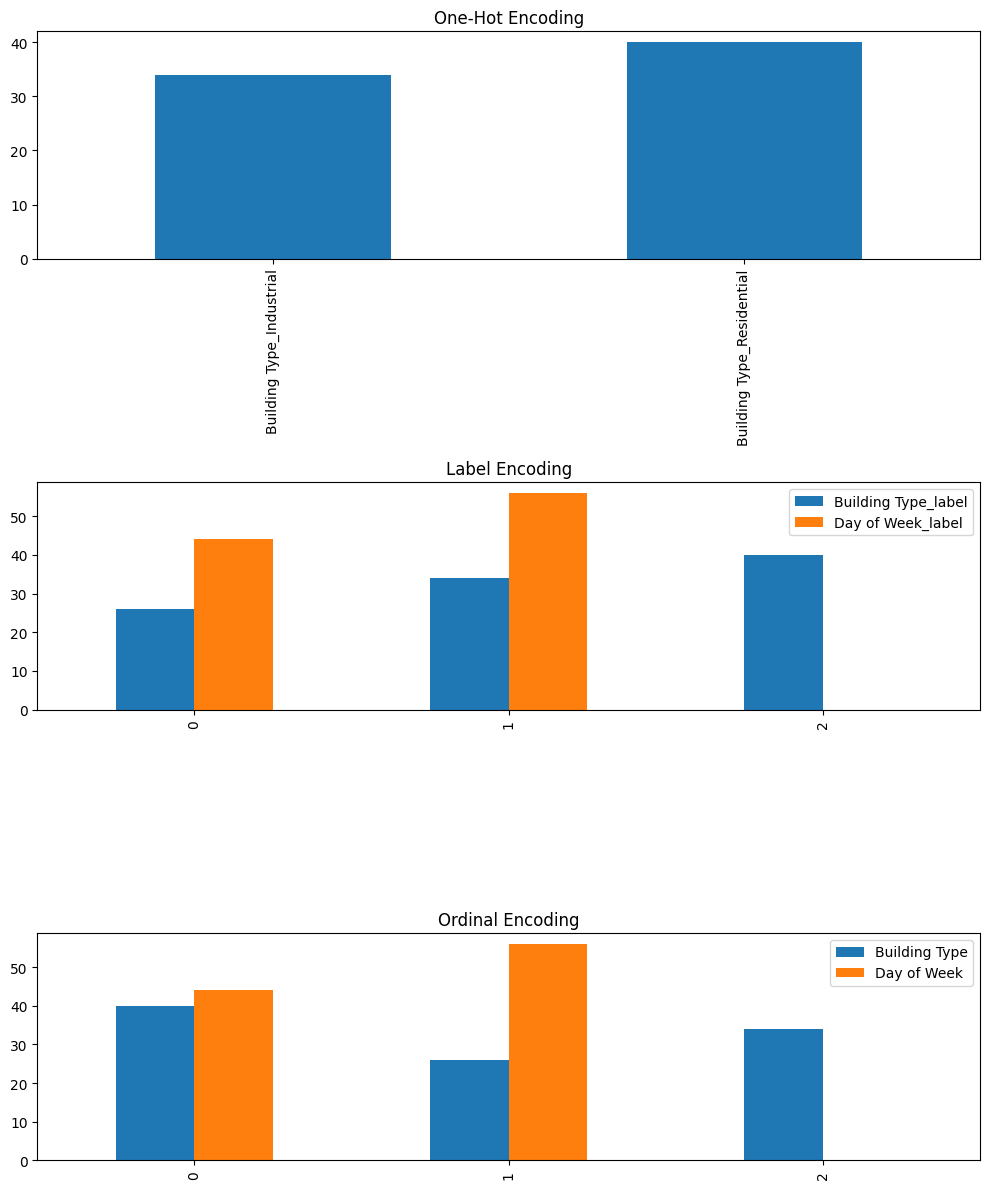

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

# Chargement des données
df = pd.read_csv('/home/test_energy_data.csv')
cat_features = ['Building Type', 'Day of Week']

# One-Hot Encoding avec drop_first pour éviter la multicolinéarité
df_ohe = pd.get_dummies(df, columns=cat_features, drop_first=True)
print("One-Hot Encoding - Colonnes créées:")
print([col for col in df_ohe.columns if 'Type_' in col or 'Day_' in col])

le = LabelEncoder()
df_le = df.copy()
for col in cat_features:
    df_le[col+'_label'] = le.fit_transform(df[col])

print("\nLabel Encoding - Mapping:")
for col in cat_features:
    print(f"{col}: {dict(zip(le.classes_, range(len(le.classes_))))}")

# Définition manuelle de l'ordre pour Building Type
building_order = ['Residential', 'Commercial', 'Industrial']  # Ordre arbitraire
day_order = ['Weekday', 'Weekend']  # Ordre logique

ordinal_encoder = OrdinalEncoder(
    categories=[building_order, day_order],
    dtype=int
)

df_ordinal = df.copy()
df_ordinal[cat_features] = ordinal_encoder.fit_transform(df[cat_features])

print("\nOrdinal Encoding - Valeurs transformées:")
print(df_ordinal[cat_features].head())

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# One-Hot
df_ohe.filter(regex='Type_|Day_').sum().plot(kind='bar', ax=axes[0])
axes[0].set_title('One-Hot Encoding')

# Label
df_le[['Building Type_label', 'Day of Week_label']].apply(pd.Series.value_counts).plot(kind='bar', ax=axes[1])
axes[1].set_title('Label Encoding')

# Ordinal
df_ordinal[cat_features].apply(pd.Series.value_counts).sort_index().plot(kind='bar', ax=axes[2])
axes[2].set_title('Ordinal Encoding')

plt.tight_layout()
plt.show()

MinMaxScaler - Statistiques :
     Square Footage  Number of Occupants  Appliances Used  \
min             0.0                  0.0              0.0   
max             1.0                  1.0              1.0   

     Average Temperature  Energy Consumption  
min                  0.0                 0.0  
max                  1.0                 1.0  

StandardScaler - Statistiques :
      Square Footage  Number of Occupants  Appliances Used  \
mean            0.00                 0.00             0.00   
std             1.01                 1.01             1.01   

      Average Temperature  Energy Consumption  
mean                 0.00               -0.00  
std                  1.01                1.01  

RobustScaler - Statistiques (médiane & écart interquartile) :
     Square Footage  Number of Occupants  Appliances Used  \
50%        0.000000                  0.0         0.000000   
75%        0.439568                  0.5         0.522222   
25%       -0.560432                

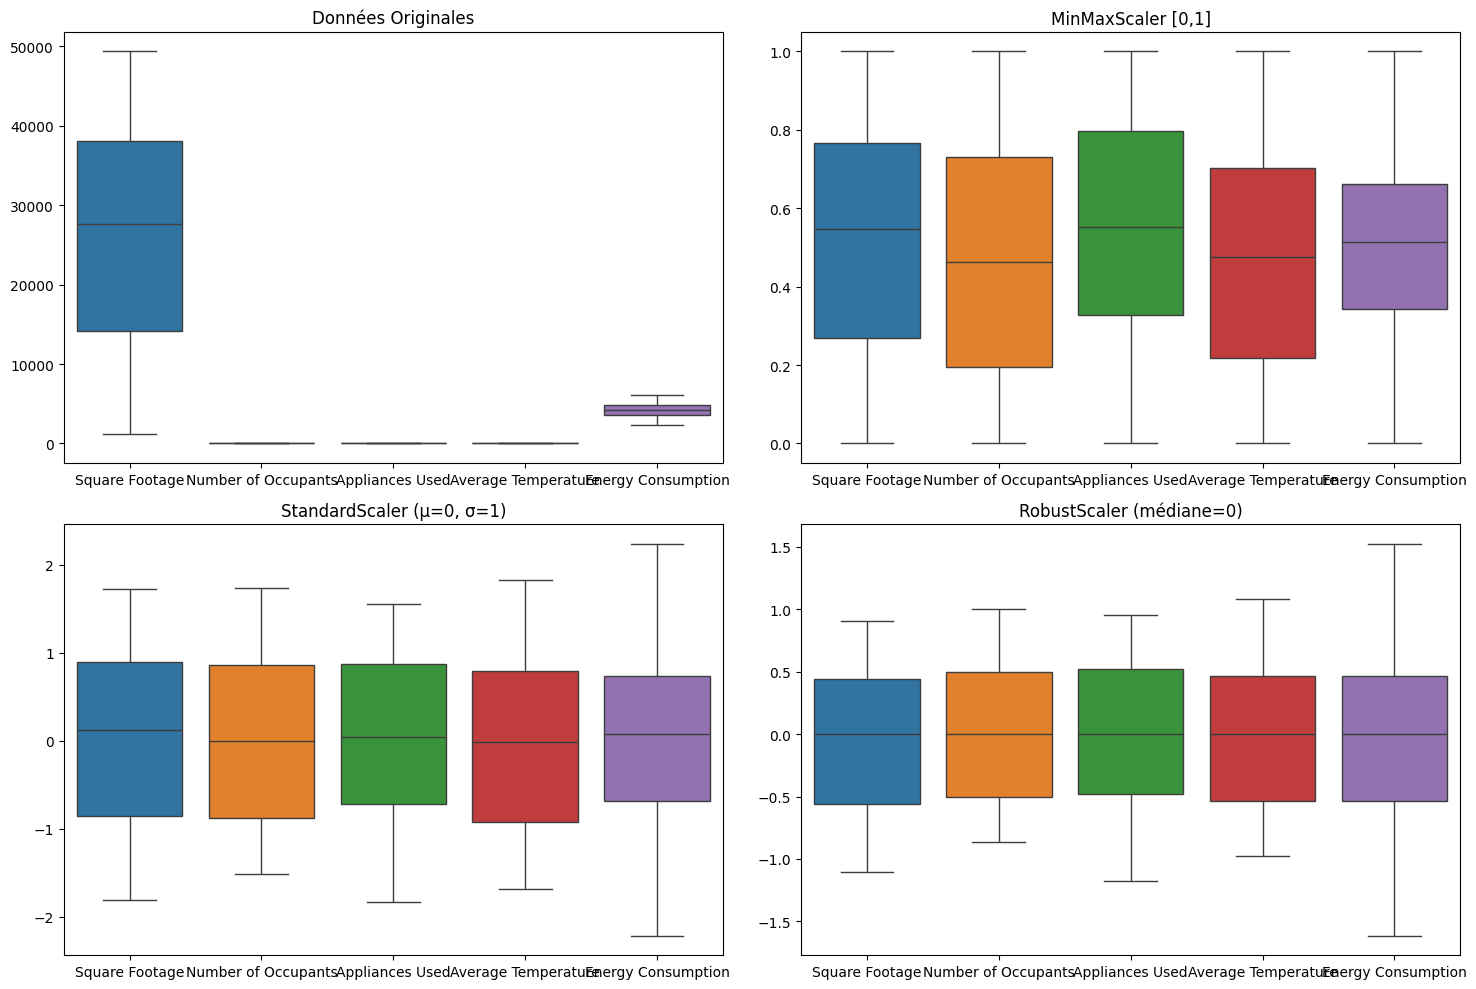

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Chargement des données
df = pd.read_csv("/home/test_energy_data.csv")

# Colonnes numériques à normaliser
numeric_features = ["Square Footage", "Number of Occupants", "Appliances Used", "Average Temperature", "Energy Consumption"]
X = df[numeric_features]

minmax = MinMaxScaler(feature_range=(0, 1))  # [0,1] par défaut
X_minmax = minmax.fit_transform(X)
df_minmax = pd.DataFrame(X_minmax, columns=numeric_features)
print("MinMaxScaler - Statistiques :")
print(df_minmax.describe().loc[["min", "max"]])

std_scaler = StandardScaler()
X_standard = std_scaler.fit_transform(X)
df_standard = pd.DataFrame(X_standard, columns=numeric_features)
print("\nStandardScaler - Statistiques :")
print(df_standard.describe().loc[["mean", "std"]].round(2))

robust = RobustScaler()  # Utilise les quartiles (résistant aux outliers)
X_robust = robust.fit_transform(X)
df_robust = pd.DataFrame(X_robust, columns=numeric_features)
print("\nRobustScaler - Statistiques (médiane & écart interquartile) :")
print(df_robust.describe().loc[["50%", "75%", "25%"]])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Distribution originale
plt.subplot(2, 2, 1)
sns.boxplot(data=X)
plt.title("Données Originales")

# MinMaxScaler
plt.subplot(2, 2, 2)
sns.boxplot(data=df_minmax)
plt.title("MinMaxScaler [0,1]")

# StandardScaler
plt.subplot(2, 2, 3)
sns.boxplot(data=df_standard)
plt.title("StandardScaler (μ=0, σ=1)")

# RobustScaler
plt.subplot(2, 2, 4)
sns.boxplot(data=df_robust)
plt.title("RobustScaler (médiane=0)")

plt.tight_layout()
plt.show()

Features conservées: [ True  True  True  True  True]
Variance expliquée: [0.35350311 0.24915203 0.19561071 0.17537853]


<Axes: >

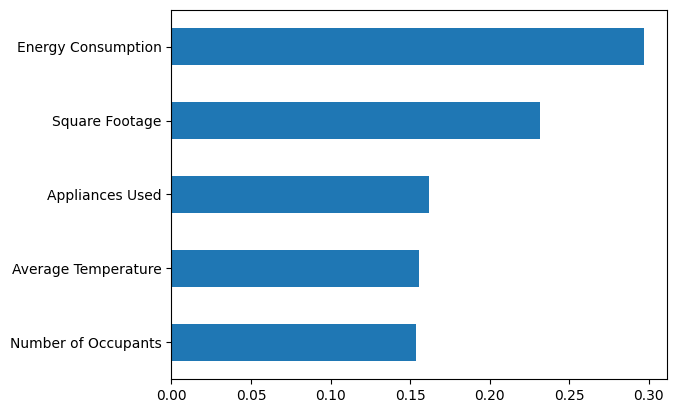

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming 'Energy Consumption' is your target variable
y = df['Building Type']  # Replace 'Energy Consumption' with your actual target column name if different

selector = VarianceThreshold(threshold=0.01)  # Supprime les features peu variables
X_reduced = selector.fit_transform(X_scaled)
print(f"Features conservées: {selector.get_support()}")

pca = PCA(n_components=0.95)  # Conserve 95% de la variance
X_pca = pca.fit_transform(X_scaled)
print(f"Variance expliquée: {pca.explained_variance_ratio_}")

model = RandomForestClassifier()
model.fit(X_scaled, y)  # Now 'y' is defined
importance = model.feature_importances_
pd.Series(importance, index=X.columns).sort_values().plot(kind='barh')

Features conservées par VarianceThreshold: [ True  True  True  True  True]
Nombre de features après VarianceThreshold: 5
Ratio de variance expliquée par chaque composante PCA: [0.35350311 0.24915203 0.19561071 0.17537853]
Variance totale expliquée: 0.97
Nombre de features après PCA: 4


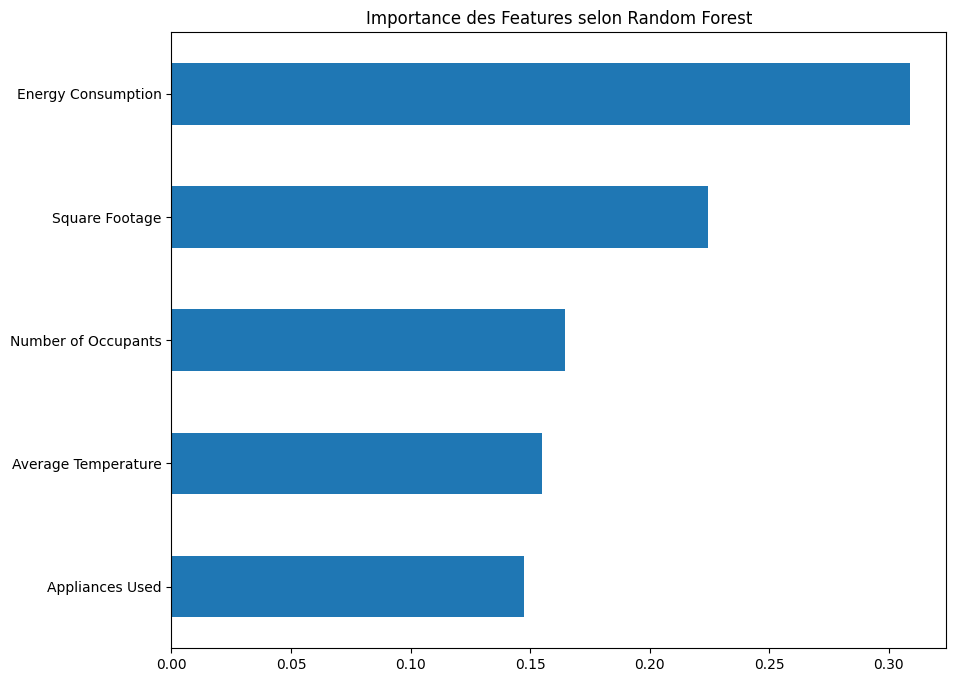

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Initialiser le sélecteur avec un seuil de variance (ex: 0.01)
# Les features avec une variance <= threshold seront supprimées.
# Un seuil de 0 supprime les features constantes.
selector = VarianceThreshold(threshold=0.01)

# Appliquer le sélecteur aux données mises à l'échelle
X_reduced_variance = selector.fit_transform(X_scaled)

# Afficher quelles features ont été conservées (True) ou supprimées (False)
print(f"Features conservées par VarianceThreshold: {selector.get_support()}")
print(f"Nombre de features après VarianceThreshold: {X_reduced_variance.shape[1]}")

from sklearn.decomposition import PCA
import numpy as np

# Initialiser PCA.
# n_components peut être :
# - un entier: le nombre exact de composantes à garder.
# - un float (entre 0 et 1): le pourcentage minimum de variance à conserver.
# Ici, on garde assez de composantes pour expliquer 95% de la variance.
pca = PCA(n_components=0.95)

# Appliquer PCA aux données mises à l'échelle
X_pca = pca.fit_transform(X_scaled)

# Afficher le ratio de variance expliqué par chaque composante sélectionnée
print(f"Ratio de variance expliquée par chaque composante PCA: {pca.explained_variance_ratio_}")
# Afficher la variance totale expliquée
print(f"Variance totale expliquée: {np.sum(pca.explained_variance_ratio_):.2f}")
print(f"Nombre de features après PCA: {X_pca.shape[1]}")


from sklearn.ensemble import RandomForestClassifier # Ou RandomForestRegressor si y est continue
import pandas as pd
import matplotlib.pyplot as plt

# Assurez-vous d'avoir vos features initiales dans un DataFrame pour les noms
# Si X_scaled est un array numpy, créez un DataFrame temporaire
if not isinstance(X_scaled, pd.DataFrame):
    # Si X est votre DataFrame original avant scaling
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
else:
    X_scaled_df = X_scaled

# Initialiser et entraîner un modèle Random Forest
# n_estimators: nombre d'arbres dans la forêt
model_importance = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model_importance.fit(X_scaled_df, y) # Utilise les données mises à l'échelle et la cible y

# Obtenir l'importance des features
importance = model_importance.feature_importances_

# Créer une Série pandas pour visualiser facilement
feature_importance_series = pd.Series(importance, index=X_scaled_df.columns)

# Trier et afficher les importances (par exemple, les 20 premières)
plt.figure(figsize=(10, 8))
feature_importance_series.sort_values().plot(kind='barh')
plt.title("Importance des Features selon Random Forest")
plt.show()

# Sélectionner les features basées sur un seuil d'importance
# threshold_importance = 0.01 # Exemple de seuil
# selected_features = feature_importance_series[feature_importance_series > threshold_importance].index
# X_reduced_rf = X_scaled_df[selected_features]
# print(f"Nombre de features après sélection par importance: {X_reduced_rf.shape[1]}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Encodage des étiquettes cibles (Building Type)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Reset X to original DataFrame before selecting features:
X = df.copy() # This will include 'Day of Week'

# Encodage one-hot pour 'Day of Week'
X = pd.get_dummies(X, columns=['Day of Week'], drop_first=True)

# Selection of numeric features and one-hot encoded 'Day of Week'
X = X[[c for c in X.columns if c in numeric_features or 'Day of Week' in c]] # Select relevant columns

# Nettoyage des valeurs infinies et manquantes
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()
y_encoded = y_encoded[X.index]  # réalignement

# Modèle de classification
model = RandomForestClassifier()

# Validation croisée
scores = cross_val_score(model, X, y_encoded, cv=5, scoring='accuracy')

print("Scores (précision par fold) :", scores)
print("Score moyen :", scores.mean())

Scores (précision par fold) : [0.6  0.5  0.5  0.55 0.5 ]
Score moyen : 0.53


Tailles finales : Train (60, 5), Val (20, 5), Test (20, 5)


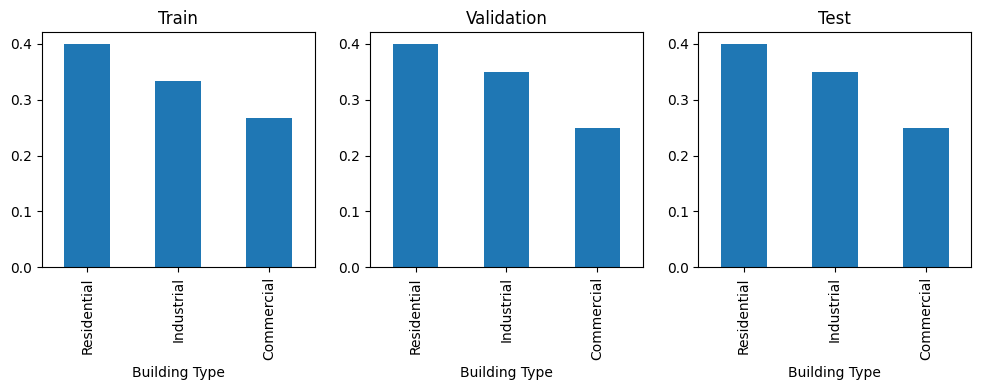

In [ ]:
from sklearn.model_selection import train_test_split

# Séparation initiale Train (80%) / Test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Conservation des proportions des classes
)

# Séparation du Train en Train (80%) / Validation (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.25,  # 0.25 × 0.8 = 20% du total
    random_state=42
)

print(f"Tailles finales : Train {X_train.shape}, Val {X_val.shape}, Test {X_test.shape}")



import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
for i, (data, name) in enumerate(zip(
    [y_train, y_val, y_test],
    ['Train', 'Validation', 'Test']
)):
    plt.subplot(1, 3, i+1)
    data.value_counts(normalize=True).plot(kind='bar')
    plt.title(name)
plt.tight_layout()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

# Configuration de la validation croisée
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier()

# Évaluation
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Accuracy moyenne : {scores.mean():.2f} (±{scores.std():.2f})")


from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=skf)



from sklearn.model_selection import GridSearchCV, KFold

# Configuration
param_grid = {'n_estimators': [100, 200]}
inner_cv = KFold(n_splits=3)
outer_cv = KFold(n_splits=5)

# Nested CV
# Assign the GridSearchCV object to the variable 'search'
search = GridSearchCV(model, param_grid, cv=inner_cv)
nested_score = cross_val_score(search, X_train, y_train, cv=outer_cv) # Use 'search' here
print(f"Score avec nested CV : {nested_score.mean():.2f}")

from sklearn.metrics import classification_report

# Fit the GridSearchCV object before accessing best_estimator_
search.fit(X_train, y_train) # This line is added to fit the model

# Prédiction sur le test set (UNIQUEMENT À LA FIN)
y_pred = search.best_estimator_.predict(X_test) # Now 'search' is defined and fitted
print(classification_report(y_test, y_pred))

Accuracy moyenne : 0.55 (±0.16)
Score avec nested CV : 0.47
              precision    recall  f1-score   support

  Commercial       0.14      0.20      0.17         5
  Industrial       0.40      0.29      0.33         7
 Residential       0.50      0.50      0.50         8

    accuracy                           0.35        20
   macro avg       0.35      0.33      0.33        20
weighted avg       0.38      0.35      0.36        20

